In [2]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

In [3]:
import matplotlib.pyplot as plt


In [4]:
#pip install wordcloud

In [5]:
from wordcloud import WordCloud

In [9]:
# creating empty reviews list 
OnePlus_tv_reviews=[]

In [10]:
for i in range (1,21):
    ip=[]
    url='https://www.flipkart.com/oneplus-y-series-100-cm-40-inch-full-hd-led-smart-android-tv/product-reviews/itmdcbd9784403b2?pid=TVSG25MMGB8NKFD8&lid=LSTTVSG25MMGB8NKFD8MWAMJF&marketplace=FLIPKART'+str(i)
    response = requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews = soup.find_all("div",attrs={""})   
    for i in range (len(reviews)):
        ip.append(reviews[i].text)
    OnePlus_tv_reviews=OnePlus_tv_reviews+ip

In [11]:
OnePlus_tv_reviews

['At this price point, the TV is good to have with easy connectivity and setup.Picture quality is good for the led screen(however you can compare another tv in the same segments).The sound is good although Dolby impressions I couldn’t get in the first use(perhaps need to check more).Remote is clean and minimalistic and easy to use.Connectivity is good, able to connect to wifi via router and hotspot and the connection stays and works perfectly fine. Able to use any streaming services without...',
 'It is superior TV. Working on android pie .You can also use Oxygen play interface for a content centric view.It has good voice command Bluetooth base remote control.This TV incorporated with Gamma engine with MEMC , Super resolution , colour space mapping , dynamic contract . Connecting options with Wi Fi , Bluetooth , HDMI , ethernet are very quickly n fast response .Highly recommended for your future TV...😊😊',
 'A very nice Tv with many adjustments and a best sound quality and also nice use

In [12]:
with open('OnePlus_tv_reviews.txt','w',encoding='utf8') as output:
    output.write(str(OnePlus_tv_reviews))
    

In [15]:
#joining all reviews into a single paragraph
ip_rev_string=" ".join(OnePlus_tv_reviews)

In [16]:
import nltk

In [17]:
#removing unwanted symbols incase if exists
ip_rev_string=re.sub('[^A-Za-z' ']+', ' ', ip_rev_string).lower()
ip_rev_string=re.sub('[0-9' ']+', ' ', ip_rev_string)

In [18]:
# words that contained in mi power bank reviews
ip_reviews_words = ip_rev_string.split(" ")

In [19]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [20]:
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))


C:\Users\chinni\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['at', 'this', 'price', 'point', 'the', 'tv', 'is', 'good', 'to', 'have', 'with', 'easy', 'connectivity', 'and', 'setup', 'picture', 'quality', 'is', 'good', 'for', 'the', 'led', 'screen', 'however', 'you', 'can', 'compare', 'another', 'tv', 'in', 'the', 'same', 'segments', 'the', 'sound', 'is', 'good', 'although', 'dolby', 'impressions', 'i', 'couldn', 't', 'get', 'in', 'the', 'first', 'use', 'perhaps', 'need', 'to', 'check', 'more', 'remote', 'is', 'clean', 'and', 'minimalistic', 'and', 'easy', 'to', 'use', 'connectivity', 'is', 'good', 'able', 'to', 'connect', 'to', 'wifi', 'via', 'router', 'and', 'hotspot', 'and', 'the', 'connection', 'stays', 'and', 'works', 'perfectly', 'fine', 'able', 'to', 'use', 'any', 'streaming', 'services', 'without', 'it', 'is', 'superior', 'tv', 'working', 'on', 'android', 'pie', 'you', 'can', 'also', 'use', 'oxygen', 'play', 'interface', 'for', 'a', 'con

In [21]:
x = vectorizer.fit_transform(ip_reviews_words)

In [22]:
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\stop.txt","r") as sw:
    stop_words = sw.read()


In [23]:
stop_words=stop_words.split("\n")

In [24]:
stop_words.extend(["slow","clarity","quality","hang","pixel","color"])

In [25]:
ip_reviews_words=[w for w in ip_reviews_words if not w in stop_words]

In [26]:
#joining all reviews into single paragraph
ip_rev_string=" ".join (ip_reviews_words)

In [27]:
ip_rev_string

'price point tv good easy connectivity setup picture good led screen compare tv segments sound good dolby impressions couldn check remote clean minimalistic easy connectivity good connect wifi router hotspot connection stays works perfectly fine streaming services superior tv working android pie oxygen play interface content centric view good voice command bluetooth base remote control tv incorporated gamma engine memc super resolution colour space mapping dynamic contract connecting options wi fi bluetooth hdmi ethernet quickly fast response highly recommended future tv nice tv adjustments sound nice google assistants highly recommended great tv order day picture outstanding connectivity issue sound great range high branded tv oneplus brings high end tech device amazing prices turned blessing families products happy product tv ordere mom ui ease lady coming tech era sound superb improvement connectivity smart devices ease installation happy flipkart delivery small pretty good oosaammm

In [28]:
#word cloud can perform on the string inputs
#corpus level word cloud

In [29]:
wordcloud_ip =WordCloud(
                    background_color='black',
                    width=1500,
                    height=1000).generate (ip_rev_string)

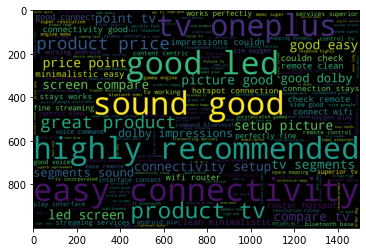

In [30]:
plt.imshow(wordcloud_ip)

In [31]:
#positive words#
with open("C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\positive-words.txt","r") as pos:
    poswords=pos.read().split("\n")

In [32]:
#positive word cloud
#choosing the only words which are present in positive words
ip_pos_in_pos=" ".join ([w for w in ip_reviews_words if w in poswords])

In [33]:
wordcloud_pos_in_pos=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_pos_in_pos)

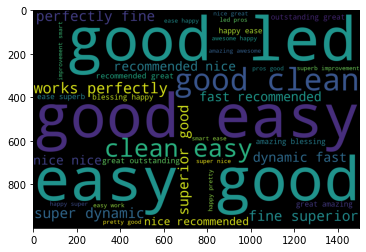

In [34]:
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

In [35]:
#negative words#
with open(r"C:\data\data science\Study material\Text Mining and sentiment analysis\Datasets NLP\negative-words.txt","r") as neg:
    negwords=neg.read().split("\n")

In [36]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])


In [37]:
wordcloud_neg_in_neg=WordCloud(
                            background_color="black",
                            width=1500,
                            height=1000).generate (ip_neg_in_neg)

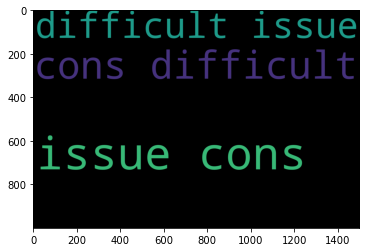

In [38]:
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

In [39]:
#word cloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
WNL=nltk.WordNetLemmatizer()

In [41]:
#Lowercase and tokenize
text=ip_rev_string.lower()

In [42]:
#remove single quotes early since it causes problem with the token
text=text.replace("'","")

In [43]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

In [44]:
text1

<Text: price point tv good easy connectivity setup picture...>

In [45]:
#remove extra chars and remove stop words
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


In [46]:

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great'] # If you want to remove any particular word form text which does not contribute much in meaning


In [47]:

new_stopwords = stopwords_wc.union(customised_words)

# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]



In [48]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [50]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)


[('point', 'tv'), ('tv', 'good'), ('good', 'easy'), ('easy', 'connectivity'), ('connectivity', 'setup'), ('setup', 'picture'), ('picture', 'good'), ('good', 'led'), ('led', 'screen'), ('screen', 'compare'), ('compare', 'tv'), ('tv', 'segment'), ('segment', 'sound'), ('sound', 'good'), ('good', 'dolby'), ('dolby', 'impression'), ('impression', 'couldn'), ('couldn', 'check'), ('check', 'remote'), ('remote', 'clean'), ('clean', 'minimalistic'), ('minimalistic', 'easy'), ('easy', 'connectivity'), ('connectivity', 'good'), ('good', 'connect'), ('connect', 'wifi'), ('wifi', 'router'), ('router', 'hotspot'), ('hotspot', 'connection'), ('connection', 'stay'), ('stay', 'work'), ('work', 'perfectly'), ('perfectly', 'fine'), ('fine', 'streaming'), ('streaming', 'service'), ('service', 'superior'), ('superior', 'tv'), ('tv', 'working'), ('working', 'android'), ('android', 'pie'), ('pie', 'oxygen'), ('oxygen', 'play'), ('play', 'interface'), ('interface', 'content'), ('content', 'centric'), ('centr

In [51]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)


['point tv', 'tv good', 'good easy', 'easy connectivity', 'connectivity setup', 'setup picture', 'picture good', 'good led', 'led screen', 'screen compare', 'compare tv', 'tv segment', 'segment sound', 'sound good', 'good dolby', 'dolby impression', 'impression couldn', 'couldn check', 'check remote', 'remote clean', 'clean minimalistic', 'minimalistic easy', 'easy connectivity', 'connectivity good', 'good connect', 'connect wifi', 'wifi router', 'router hotspot', 'hotspot connection', 'connection stay', 'stay work', 'work perfectly', 'perfectly fine', 'fine streaming', 'streaming service', 'service superior', 'superior tv', 'tv working', 'working android', 'android pie', 'pie oxygen', 'oxygen play', 'play interface', 'interface content', 'content centric', 'centric view', 'view good', 'good voice', 'voice command', 'command bluetooth', 'bluetooth base', 'base remote', 'remote control', 'control tv', 'tv incorporated', 'incorporated gamma', 'gamma engine', 'engine memc', 'memc super', 

In [52]:

# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_


{'point tv': 138,
 'tv good': 191,
 'good easy': 74,
 'easy connectivity': 57,
 'connectivity setup': 34,
 'setup picture': 164,
 'picture good': 131,
 'good led': 75,
 'led screen': 101,
 'screen compare': 160,
 'compare tv': 25,
 'tv segment': 198,
 'segment sound': 162,
 'sound good': 169,
 'good dolby': 73,
 'dolby impression': 50,
 'impression couldn': 91,
 'couldn check': 39,
 'check remote': 19,
 'remote clean': 155,
 'clean minimalistic': 20,
 'minimalistic easy': 107,
 'connectivity good': 32,
 'good connect': 72,
 'connect wifi': 28,
 'wifi router': 207,
 'router hotspot': 159,
 'hotspot connection': 90,
 'connection stay': 30,
 'stay work': 176,
 'work perfectly': 210,
 'perfectly fine': 130,
 'fine streaming': 66,
 'streaming service': 177,
 'service superior': 163,
 'superior tv': 181,
 'tv working': 200,
 'working android': 211,
 'android pie': 4,
 'pie oxygen': 134,
 'oxygen play': 129,
 'play interface': 135,
 'interface content': 97,
 'content centric': 36,
 'centric v

In [53]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])


[('easy connectivity', 40), ('good led', 40), ('sound good', 40), ('highly recommended', 40), ('tv oneplus', 40), ('product happy', 40), ('product tv', 40), ('product range', 40), ('point tv', 20), ('tv good', 20), ('good easy', 20), ('connectivity setup', 20), ('setup picture', 20), ('picture good', 20), ('led screen', 20), ('screen compare', 20), ('compare tv', 20), ('tv segment', 20), ('segment sound', 20), ('good dolby', 20), ('dolby impression', 20), ('impression couldn', 20), ('couldn check', 20), ('check remote', 20), ('remote clean', 20), ('clean minimalistic', 20), ('minimalistic easy', 20), ('connectivity good', 20), ('good connect', 20), ('connect wifi', 20), ('wifi router', 20), ('router hotspot', 20), ('hotspot connection', 20), ('connection stay', 20), ('stay work', 20), ('work perfectly', 20), ('perfectly fine', 20), ('fine streaming', 20), ('streaming service', 20), ('service superior', 20), ('superior tv', 20), ('tv working', 20), ('working android', 20), ('android pie

In [54]:

# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)


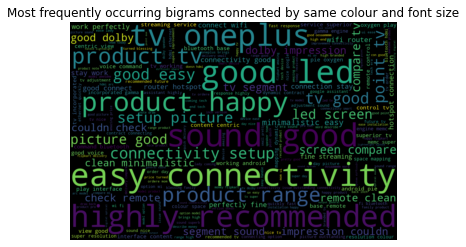

In [55]:
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
